In [1]:
import datacube


In [2]:
dc = datacube.Datacube()
ds = dc.find_datasets(product= "c2l2tony")

Failed to resolve driver datacube.plugins.index::s3aio_index
Error was: ContextualVersionConflict(botocore 1.13.32 (/usr/local/lib/python3.6/dist-packages), Requirement.parse('botocore<1.13.0,>=1.12.117'), {'boto3'})


In [3]:
len(ds)

46

In [4]:
EPSG='5072'

lon_min,lon_max,lat_min,lat_max = [-122.75,-122.64,45.59,45.65]

meas=[ 
    'blue',                              
    'green',                            
    'red',                                
]

'''
meas=['coastal_aerosol', 
    'blue',                              
    'green',                            
    'red',                                
    'nir',                              
    'swir_1',                             
    'swir_2',                             
    'quality_l2_aerosol']  
    '''

ds2 = dc.load(product="c2l2tony", datasets=ds, 
                measurements=meas, 
                output_crs='epsg:' + EPSG,
                resolution=(-30, 30),
                x=(lon_min, lon_max),
                y=(lat_min, lat_max)
              
             )

In [5]:
ds2

<xarray.Dataset>
Dimensions:  (time: 46, x: 337, y: 294)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-06T18:56:10.096979 ... 2018-12-28T16:52:19.263286
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 ... 2.801e+06 2.801e+06
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 ... -2.05e+06 -2.05e+06
Data variables:
    blue     (time, y, x) uint16 1486 1491 1485 1517 1524 1507 ... 0 0 0 0 0 0
    green    (time, y, x) uint16 1385 1380 1384 1396 1396 1407 ... 0 0 0 0 0 0
    red      (time, y, x) uint16 1252 1246 1243 1274 1270 1272 ... 0 0 0 0 0 0
Attributes:
    crs:      epsg:5072

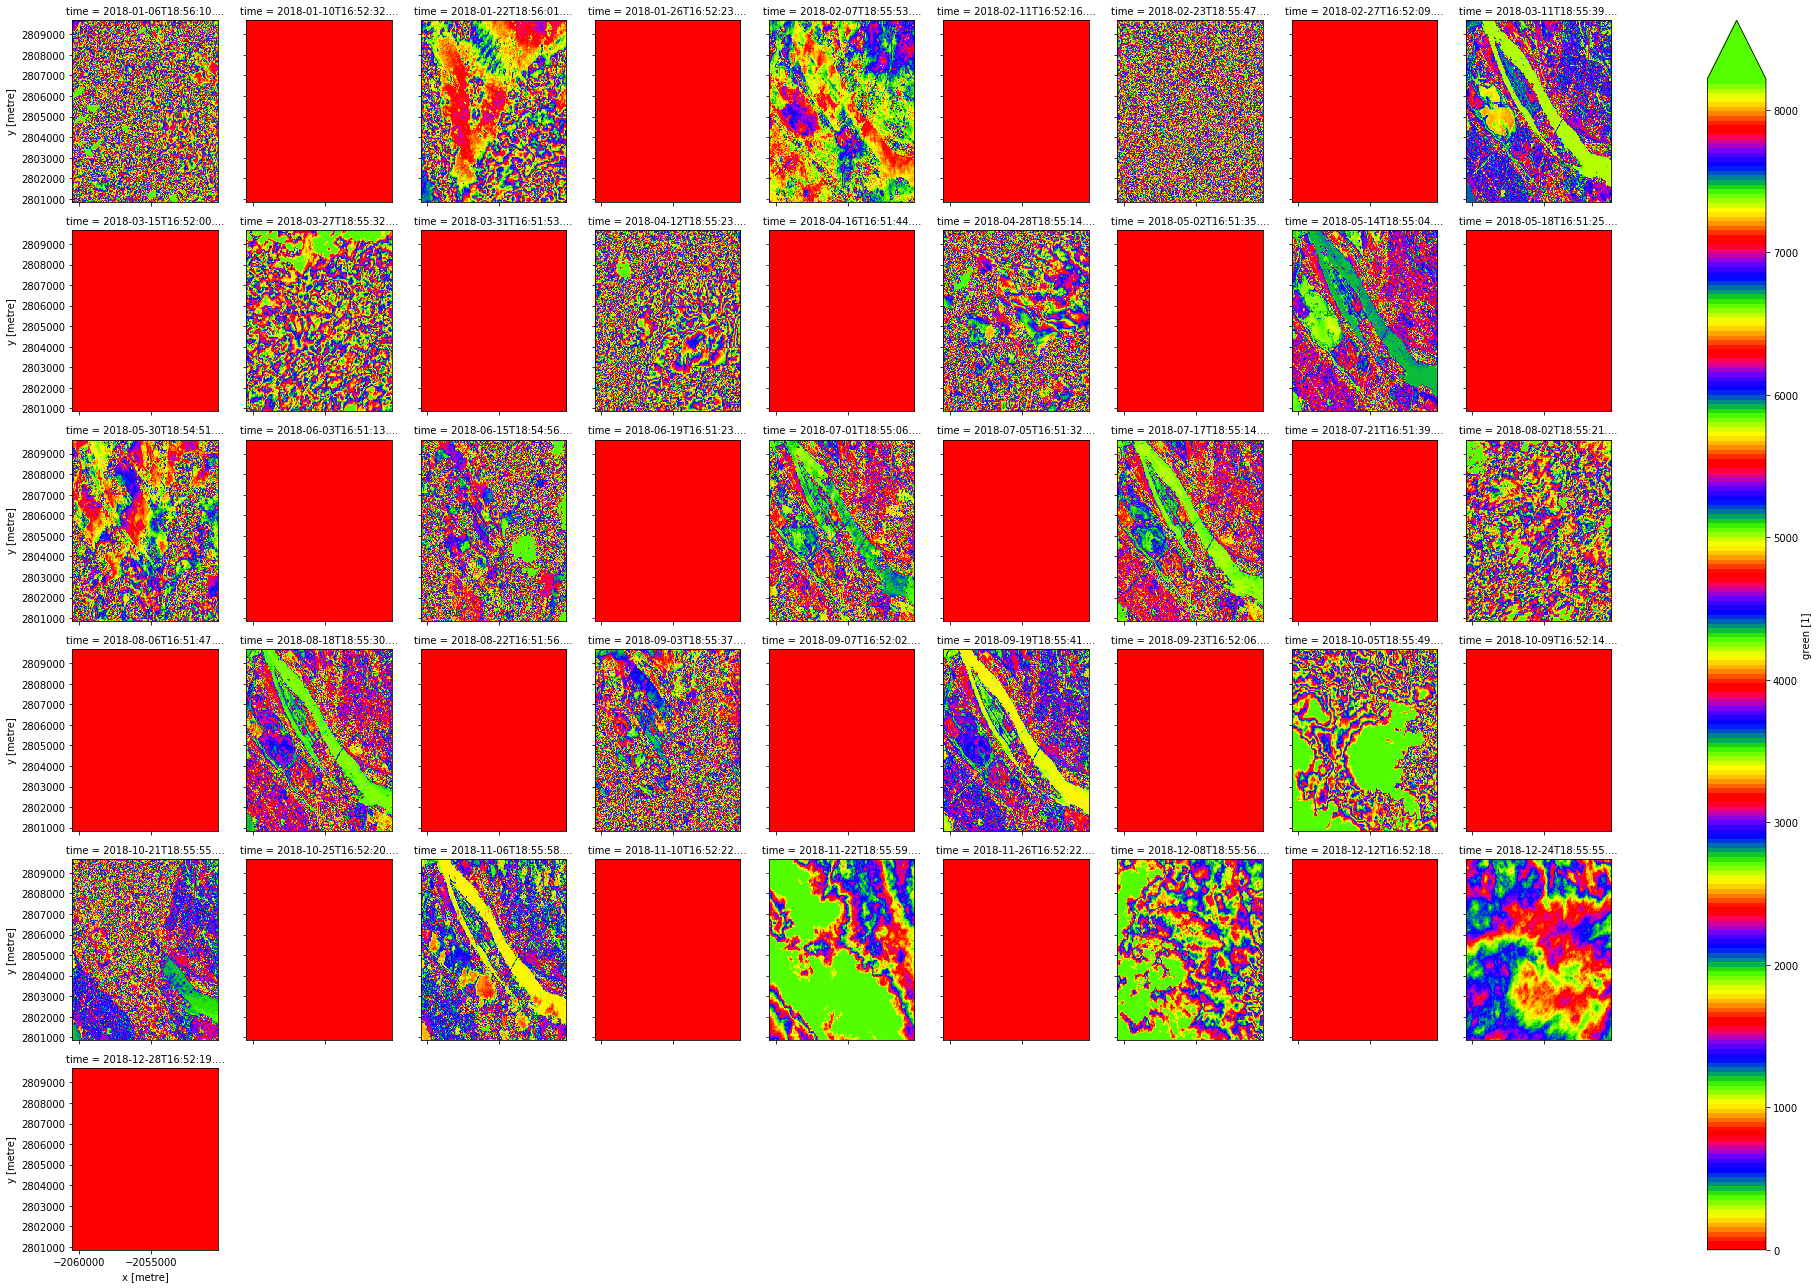

In [6]:
%matplotlib inline
display_color = 'green'
# 
ds2[display_color].plot.imshow('x', 'y', col='time', col_wrap=9, robust=True, cmap="prism")

In [7]:
#! aws s3 ls ga-africa-provisional/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF


An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


In [8]:
#! gdalinfo /vsis3/ga-africa-provisional/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF

Driver: GTiff/GeoTIFF
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.TIF.aux.xml: 403
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.aux: 403
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_SR_B1.AUX: 403
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/LC08_L2SP_190056_20180107_20190821_02_T1_S

Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/HDR2SP_190056_20180107_20190821_02_T1_SR_B1.txt: 403
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/HDR2SP_190056_20180107_20190821_02_T1_SR_B1.TXT: 403
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/HDR8_L2SP_190056_20180107_20190821_02_T1_SR_B1.txt: 403
Warning 1: HTTP response code on https://ga-africa-provisional.s3.amazonaws.com/nigeria-2018-08-21/collection2/level2/standard/oli-tirs/2018/190/056/LC08_L2SP_190056_20180107_20190821_02_T1/HDR8_L2SP_190056_20180107_20190821_02_T1_SR_B1.TXT: 403
Warning 1: HTTP respon

In [11]:
# change the measurements to explore true colour or false colour three band images

#bands = ['red', 'green', 'blue'] #True Colour
bands = ['swir_1', 'nir', 'green'] #False Colour

no_time_steps = len(ds2.time)

for time_step in range(no_time_steps):
    my_mean = ds2[bands].isel(time=time_step).to_array().mean().values
    #if (my_mean > -500):
    if (my_mean > 100):
        ds2[bands].isel(time=time_step).to_array().plot.imshow(robust=True, figsize=(5, 5))
        #data_cube[bands].isel(time=time_step).drop()

In [12]:
# change the measurements to explore true colour or false colour three band images

bands = ['red', 'green', 'blue'] #True Colour
#bands = ['swir_1', 'nir', 'green'] #False Colour

no_time_steps = len(ds2.time)

for time_step in range(no_time_steps):
    my_mean = ds2[bands].isel(time=time_step).to_array().mean().values
    #if (my_mean > -500):
    if (my_mean > 100):
        ds2[bands].isel(time=time_step).to_array().plot.imshow(robust=True, figsize=(5, 5))        
        #ds2[bands].isel(time=time_step).to_array().plot.imshow(robust=False, figsize=(5, 5))